# K-Means Clustering
K-means clustering is one of the simplest and most commonly used unsupervised learning algorithms in data science. It aims to partition a set of observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.

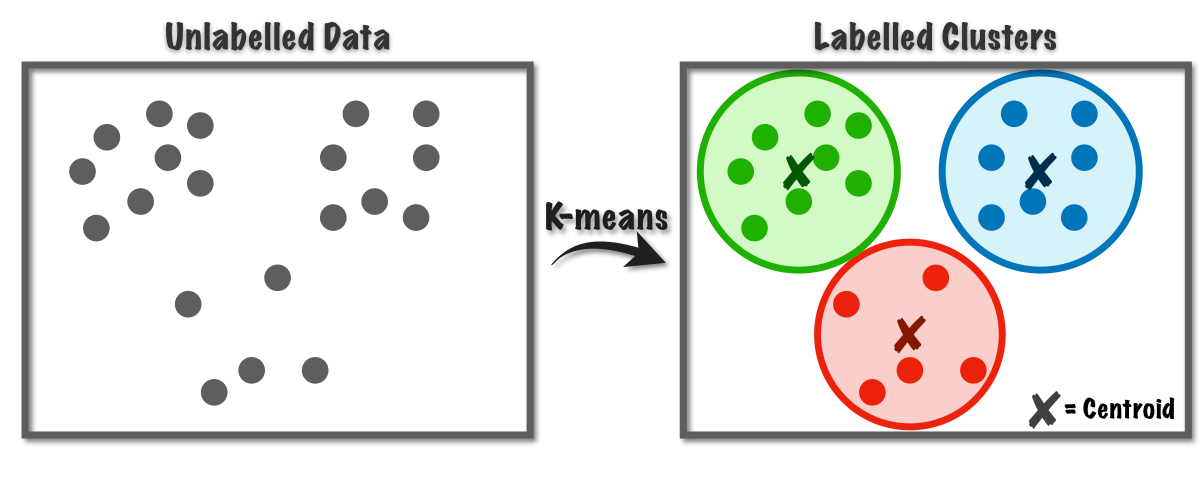

## How K-Means Works
Algorithm Steps:
1. Initialization: Select k initial centroids randomly from the data points.

2. Assignment: Assign each data point to the nearest centroid. The "nearest" is typically determined by the Euclidean distance between the point and the centroid.

3. Update: Recalculate the centroids as the mean of all data points assigned to each centroid's cluster.

4. Iteration: Repeat the assignment and update steps until none of the cluster assignments change or the changes do not significantly affect the centroids, or a maximum number of iterations is reached.

## Mathematical Formulation:
The objective of K-means is to minimize the within-cluster sum of squares (WCSS), which is the sum of squared distances between each point and its centroid. The WCSS is given by the formula:
$$
\text{WCSS} = \sum_{i=1}^{k} \sum_{x \in S_i} \| x - \mu_i \|^2
$$
where $μ_i$ is the mean (centroid) of points in $S_i$, and $∥x−μ_i∥^2$ is the squared Euclidean distance between a point x and the centroid $μ_i$. 

## Key Features of K-Means
### Pros:

- Efficiency: K-means is generally fast and efficient in terms of computational cost, typically scaling well with large datasets.
- Simplicity: The algorithm is straightforward to implement and apply, making it a popular first choice for clustering.

### Cons:
- Number of Clusters: The number of clusters k must be specified in advance, which can be a significant drawback if not known beforehand.
- Sensitivity to Initialization: The results can vary significantly based on the initial set of centroids. This issue is often addressed by running the algorithm multiple times with different initializations.
- Outliers: K-means is sensitive to noise and outliers as these can distort the mean of a cluster.
- Cluster Shape: The algorithm assumes that clusters are spherical and of similar size, which might not always be the case, leading to poor clustering performance for elongated or irregularly shaped clusters.

## Application

Let's implement this model on the Banknote Authentication Dataset, using Variance and Skewness as our two features.

In [9]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
banknote_authentication = fetch_ucirepo(id=267) 
  
# data (as pandas dataframes) 
X = banknote_authentication.data.features 
y = banknote_authentication.data.targets 

y = y.values
y = y.ravel()

X = X[['variance', 'skewness']].values
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [15]:
# Range of k values to try
k_values = range(2, 10)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Find the optimal k (highest silhouette score)
optimal_k = k_values[np.argmax(silhouette_scores)]

Here, we are choosing our K-value by evaluating which model has the largest 'Silhouette Score'. Silhouette Score measures how close each point in one cluster is to points in the neighboring clusters. This metric provides a way to assess parameters like the number of clusters visually and quantitatively. It ranges from -1 to +1, where a high value indicates that the clusters are well separated. Let's visualize what this looks like for K values 2 - 10.

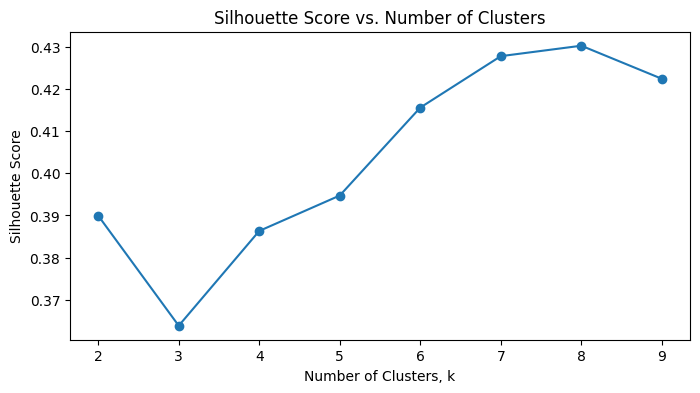

In [16]:
plt.figure(figsize=(8, 4))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters, k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xticks(k_values)
plt.show()

Here we can see our optimal K is 8. Let's continue with our model.

In [17]:
# Number of clusters
k = optimal_k
# Initialize KMeans
kmeans = KMeans(n_clusters=k)
# Fit the model to the data
kmeans.fit(X)

# Get cluster assignments
labels = kmeans.labels_
# Get coordinates of cluster centers
centers = kmeans.cluster_centers_

KMeans()

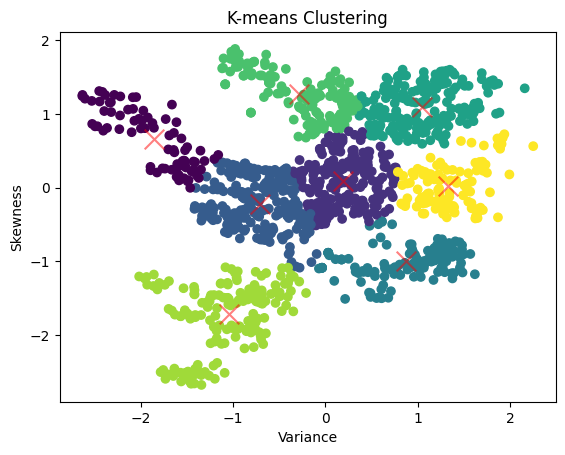

In [19]:
# Plot the points with different colors
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o')
# Plot the centroids
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5, marker='x')
plt.title('K-means Clustering')
plt.xlabel('Variance')
plt.ylabel('Skewness')
plt.show()

Here we can see our 8 clusters, with pretty well defined boundaries. To evaluate our model, we can calculate its Silhouette Score (already define), Davies Score, amd Calinski Score.

The Davies Score calculates the average 'similarity' between clusters, where similarity is a measure that compares the distance between clusters with the size of the clusters themselves. A lower Davies-Bouldin index relates to a model with better separation between the clusters.

The Calinski Score is the ratio of the sum of between-clusters dispersion and of intra-cluster dispersion for all clusters. Higher scores typically indicate that the clusters are dense and well separated, which is generally desired.

In [20]:
# Evaluation metrics
silhouette = silhouette_score(X, labels)
davies = davies_bouldin_score(X, labels)
calinski = calinski_harabasz_score(X, labels)

print("Silhouette Score: ", silhouette)
print("Davies-Bouldin Score: ", davies)
print("Calinski-Harabasz Score: ", calinski)

Silhouette Score:  0.42912987212308157
Davies-Bouldin Score:  0.7371372212021433
Calinski-Harabasz Score:  1431.4738642919642


Our model performs well across all three evaluations, but there is room for improvement. Let's see what happens when we have a larger range of K-values.

In [21]:
# Range of k values to try
k_values = range(2, 30)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Find the optimal k (highest silhouette score)
optimal_k = k_values[np.argmax(silhouette_scores)]

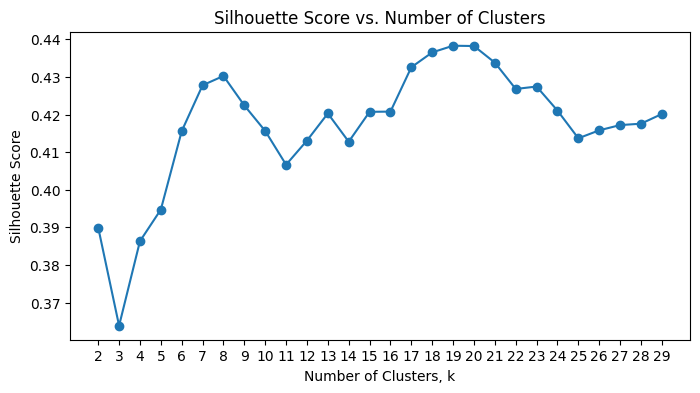

In [22]:
plt.figure(figsize=(8, 4))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters, k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xticks(k_values)
plt.show()

Here we can see our optimal K is 21. Let's test our new model and evaluate it.

In [23]:
# Number of clusters
k = optimal_k
# Initialize KMeans
kmeans = KMeans(n_clusters=k)
# Fit the model to the data
kmeans.fit(X)

# Get cluster assignments
labels = kmeans.labels_
# Get coordinates of cluster centers
centers = kmeans.cluster_centers_

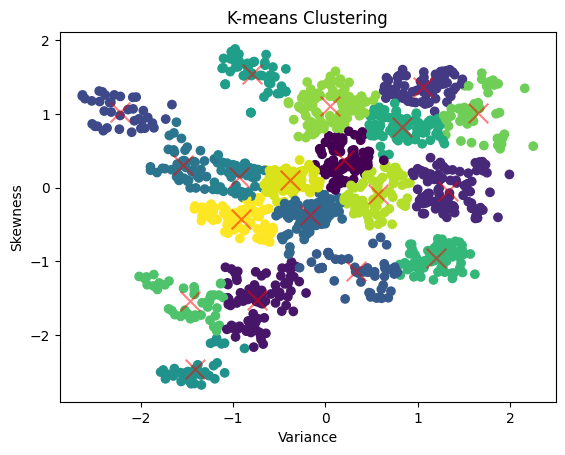

In [24]:
# Plot the points with different colors
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o')
# Plot the centroids
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5, marker='x')
plt.title('K-means Clustering')
plt.xlabel('Variance')
plt.ylabel('Skewness')
plt.show()

In [25]:
# Evaluation metrics
silhouette = silhouette_score(X, labels)
davies = davies_bouldin_score(X, labels)
calinski = calinski_harabasz_score(X, labels)

print("Silhouette Score: ", silhouette)
print("Davies-Bouldin Score: ", davies)
print("Calinski-Harabasz Score: ", calinski)

Silhouette Score:  0.43088403960922655
Davies-Bouldin Score:  0.7390334186665753
Calinski-Harabasz Score:  1759.0111980422796


It seems our model marginally improved, indicating this is most likely the cap for K-means clustering on this dataset. Onto the next type of Unsupervised Learning!